In [1]:
# To use this jupyter notebook, please go to the github page of the Free Music Archive and click on the binder badge
# or click on the following link https://mybinder.org/v2/gh/mdeff/fma/outputs?urlpath=lab/tree/usage.ipynb 
# This jupyter notebook has to be run after the code from the link above

# import
import matplotlib
matplotlib.use('Agg')
import sys

# Plot genres
df = genres.loc[genres['top_level'].unique()].sort_values('#tracks', ascending=False)
num = df['#tracks'].values.tolist()
title = df['title'].values.tolist()
x = []
for i in range (len(title)):
    x.append(i)
    
plt.xticks(x, title, rotation=45)
plt.gcf().subplots_adjust(bottom=0.35)
plt.bar(x, num)
plt.xlabel("Genre")
plt.ylabel("#tracks")
plt.legend()
plt.savefig(r'genre.png')
plt.close()
plt.savefig(sys.stdout.buffer)

# 163 genres
genres['title'].count()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# small subset 
small = tracks['set', 'subset'] <= 'small'
# x features mfcc, get rid of the 'mfcc' to run with all the features
X = features.loc[small, 'mfcc']
# y -> top genre
y = tracks.loc[small, ('track', 'genre_top')]
# split into training data (80%) and test data (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
# fit logistic regression model on training data
lr = LogisticRegression()
lr.fit(X_train, y_train)
# perform prediction and state whether it is correct
correct = 0
incorrect = 0
y_predicted = lr.predict(X_test)
for i in range(0, len(y_test)):
    # print("Predicted class: " + str(y_test[i]) + " / Correct class: "+ str(y_predicted[i]) + "\n")
    if (y_test[i] == y_predicted[i]):
        correct = correct + 1
    else:
        incorrect = incorrect + 1
        
print(str(correct) + " classified correctly")
print(str(incorrect) + " classified incorrectly") 

# Computing Quality Measures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# generate confusion matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print("confusion matrix ")
print(conf)

# compute accuracy
acc_score =accuracy_score(y_true=y_test, y_pred=y_predicted) 
print("accuracy ", acc_score)

# compute precision
prec_score = precision_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("precision ", prec_score)

# compute recall
recall = recall_score(y_true=y_test, y_pred=y_predicted, average='macro')
print("recall ", recall)

# compute f1
f1 = f1_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("f1 ", f1)

# Plot Instrumental and Electronic

genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

X = features.loc[small & (genre1 | genre2), 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)

y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
# fit logist
y = skl.preprocessing.LabelEncoder().fit_transform(y)
lr = LogisticRegression()
lr.fit(X_train, y_train)
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
plt.plot(X[:,0], (-lr.intercept_[0]-lr.coef_[0][0]*X[:,0])/lr.coef_[0][1], color="black", lw=2)
plt.xlim([-500, 750])
plt.ylim([-300, 300])
plt.savefig(r'lr.png')
plt.close()
plt.savefig(sys.stdout.buffer)


NameError: name 'genres' is not defined

In [ ]:
#KNN best estimation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
X = features.loc[small, 'mfcc']
y = tracks.loc[small, ('track', 'genre_top')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# normalize data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train) # determine min and max
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

accuracy = []
# loop to find best knn
for i in range(20):
    if i == 0:
        pass
    else :
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train_normalized, y_train)
        y_predicted = knn.predict(X_test_normalized)
        x = accuracy_score(y_true=y_test, y_pred=y_predicted)
        accuracy.append(x)
        print(i)
        
# compute accuracy
print(accuracy) 
# Best 7 

In [ ]:
# KNN 7
#KNN best estimation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

X = features.loc[small, 'mfcc']
y = tracks.loc[small, ('track', 'genre_top')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# normalize data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train) # determine min and max
X_train_normalized = min_max_scaler.transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_normalized, y_train)
y_predicted = knn.predict(X_test_normalized)

# generate confusion matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print("confusion matrix ")
print(conf)

# compute accuracy
acc_score =accuracy_score(y_true=y_test, y_pred=y_predicted) 
print("accuracy ", acc_score)

# compute precision
prec_score = precision_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("precision ", prec_score)

# compute recall
recall = recall_score(y_true=y_test, y_pred=y_predicted, average='macro')
print("recall ", recall)

# compute f1
f1 = f1_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("f1 ", f1)


In [ ]:
#tree

# learn decision tree of maximal depth 6
tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
tree.fit(X_train,y_train)
y_predicted = tree.predict(X_test)

In [ ]:
# majority 3 models
from sklearn.ensemble import VotingClassifier

# fit logistic regression model on training data
lr = LogisticRegression()

# use kNN with k = 3
knn = KNeighborsClassifier(n_neighbors=9)

# learn decision tree
tree = DecisionTreeClassifier(criterion='entropy')

# voting classifier
vc = VotingClassifier(estimators=[('lr',lr),('knn',knn), ('tree', tree)], voting='hard')
vc.fit(X_train, y_train)
y_predicted = vc.predict(X_test)

In [ ]:
#Perceptrons
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
clf = MLPClassifier(random_state=0, max_iter=2000, activation ='logistic', solver ='lbfgs').fit(X_train, y_train)
y_predicted = clf.predict(X_test)

In [ ]:
#Multiplot
import matplotlib
matplotlib.use('Agg')
import sys


small = tracks['set', 'subset'] <= 'small'
genre1 = tracks['track', 'genre_top'] == 'Instrumental'
genre2 = tracks['track', 'genre_top'] == 'Electronic'

columns = ['mfcc', 'chroma_cens', 'tonnetz', 'spectral_contrast','spectral_centroid',
           'spectral_bandwidth', 'spectral_rolloff','rmse', 'zcr']
nb_col = 3
nb_row = 3
count = 1
for i in columns :
    X = features.loc[small & (genre1 | genre2), i]
    X = skl.decomposition.PCA(n_components=2).fit_transform(X)

    y = tracks.loc[small & (genre1 | genre2), ('track', 'genre_top')]
    y = skl.preprocessing.LabelEncoder().fit_transform(y)

    plt.subplot(nb_row,nb_col,count)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', alpha=0.5)
    #plt.xlim([-500, 750])
    #plt.ylim([-300, 300])
    count+=1
plt.savefig(r'comparison2.png')
plt.close()
plt.savefig(sys.stdout.buffer)

In [ ]:
#SVC
X = features.loc[small]
y = tracks.loc[small, ('track', 'genre_top')]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_predicted = clf.predict(X_test)
# generate confusion matrix
conf = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print("confusion matrix ")
print(conf)

# compute accuracy
acc_score =accuracy_score(y_true=y_test, y_pred=y_predicted) 
print("accuracy ", acc_score)

# compute precision
prec_score = precision_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("precision ", prec_score)

# compute recall
recall = recall_score(y_true=y_test, y_pred=y_predicted, average='macro')
print("recall ", recall)

# compute f1
f1 = f1_score(y_true=y_test, y_pred=y_predicted, average='macro') 
print("f1 ", f1)

[[0.99895845]
 [0.97512245]]
(2, 200)
[[0.62613659 0.72398265 0.18807798 0.90511866 0.56475591 0.86596478
  0.46918046 0.8509977  0.20367976 0.35834001 0.49567172 0.21353135
  0.69844012 0.50023499 0.42982083 0.47687825 0.55764588 0.50315353
  0.96477315 0.46329228 0.34973702 0.65918829 0.68556107 0.47873124
  0.33821104 0.23159443 0.93544575 0.31746375 0.68858707 0.04757034
  0.81431594 0.59360539 0.13961029 0.49153897 0.98057897 0.59812965
  0.00893375 0.01530101 0.80555684 0.97699885 0.3170575  0.50288178
  0.03336491 0.86471268 0.71494467 0.12156627 0.81466872 0.59589132
  0.88926758 0.19356081 0.43435149 0.35994762 0.06355749 0.14645151
  0.34576183 0.37267671 0.17659586 0.40973343 0.97557456 0.51838005
  0.06401358 0.86924119 0.85759319 0.8882803  0.39539545 0.99639936
  0.74236682 0.60808572 0.4230197  0.26000519 0.0059688  0.70888331
  0.82843244 0.92237564 0.36575052 0.33659301 0.62324005 0.16958064
  0.24988588 0.03110728 0.49254894 0.95532454 0.36822041 0.05829798
  0.232925

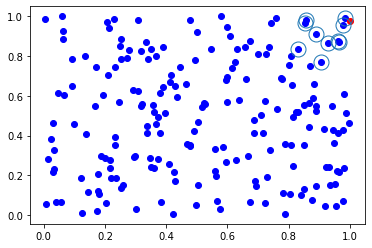

In [5]:
from numpy import random,argsort,sqrt
from pylab import plot,show

# Music Transition

# Nearest Neighbor function
def knn_search(x, D, K):
 ndata = D.shape[1]
 K = K if K < ndata else ndata
 # euclidean distances from the other points
 sqd = sqrt(((D - x[:,:ndata])**2).sum(axis=0))
 idx = argsort(sqd) # sorting
 # return the indexes of K nearest neighbours
 return idx[:K]

# array to store values
list_idx=[]
X = features.loc[small, 'mfcc']
X = skl.decomposition.PCA(n_components=2).fit_transform(X)
X = X.T
# Coordinates of the two songs
x1 = X[0][5]
x2 = X[0][-301]
y1 = X[1][5]
y2 = X[1][-301]
print(x1, y1)
print(x2, y2)

x = random.rand(2,1)
# Number of songs for transition (-1)
step = 10
plot(X[0,:],X[1,:],'ob')
# Step size
movex = (x2-x1)/(step-1)
movey = (y2-y1)/(step-1)
# Do until we reach the second song
for i in range(step-2):
    x1 = movex + x1
    y1 = movey + y1
    x[0][0]=x1
    x[1][0]=y1
    # performing the search
    neig_idx = knn_search(x,X,1)
    list_idx.append(neig_idx)
    plot(x[0,0],x[1,0],'or')
    # highlighting the neighbours
    plot(X[0,neig_idx],X[1,neig_idx],'o', markerfacecolor='None',markersize=15,markeredgewidth=1)
print(list_idx)
show()
# Save the title
y = tracks.loc[small & (genre1 | genre2), ('track', 'title')]
list_title = []
list_id = []
list_title.append(y.iloc[0])
list_id.append(y.index[0])
for i in list_idx:
    x = y.iloc[i]
    zz = x.iloc[0]
    zzz = x.index[0]
    list_title.append(zz)
    list_id.append(zzz)
list_title.append(y.iloc[-9])
list_id.append(y.index[-9])
print(list_title)
print(list_id)

#Need to download the 7.2 giga file of music fma_small to work -> Listen to the sounds
for i in list_id :
    filename = utils.get_audio_path(AUDIO_DIR, i)
    print('File: {}'.format(filename))

    x, sr = librosa.load(filename, sr=None, mono=True)
    print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))

    start, end = 7, 17
    ipd.Audio(data=x[start*sr:end*sr], rate=sr)